In [66]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as pl
import mlxtend as mx
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
pl.rcParams['figure.figsize'] = (16, 9)
pl.style.use('ggplot')

In [67]:
data=pd.read_csv("estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [68]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [69]:
data["gender"]=data['gender'].astype('category')
data["race/ethnicity"]=data['race/ethnicity'].astype('category')
data["parental level of education"]=data['parental level of education'].astype('category')
data["lunch"]=data['lunch'].astype('category')
data["test preparation course"]=data['test preparation course'].astype('category')

In [70]:
data["gender"]=data['gender'].cat.codes
data["race/ethnicity"]=data['race/ethnicity'].cat.codes
data["parental level of education"]=data['parental level of education'].cat.codes
data["lunch"]=data['lunch'].cat.codes
data["test preparation course"]=data['test preparation course'].cat.codes

In [71]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


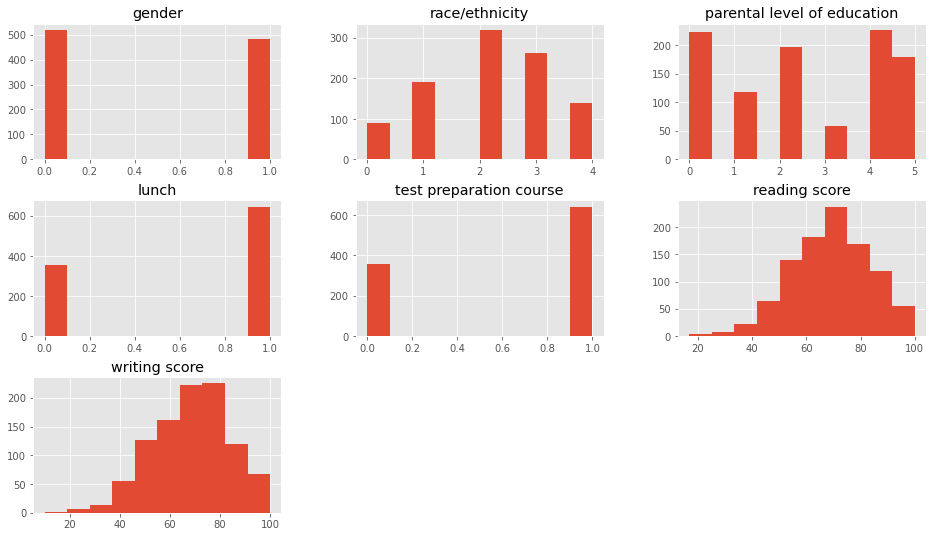

In [72]:
data.drop(['math score'],1).hist()
pl.show()

C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AlvaroChavarri\anaconda3\lib\site-packages\seaborn\distributions.py:30

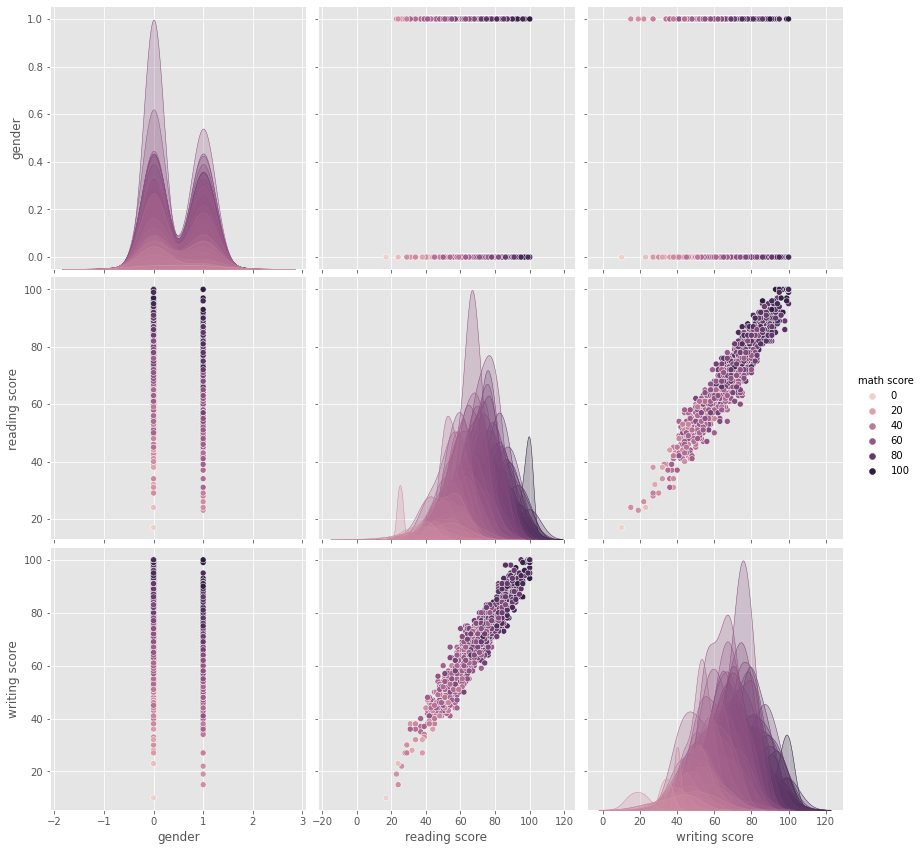

In [73]:
sb.pairplot(data.dropna(), hue='math score',vars=["gender","reading score","writing score"],size=4,kind='scatter')

In [143]:
X=np.array(data[["reading score","writing score"]])
Y=np.array(data['math score'])

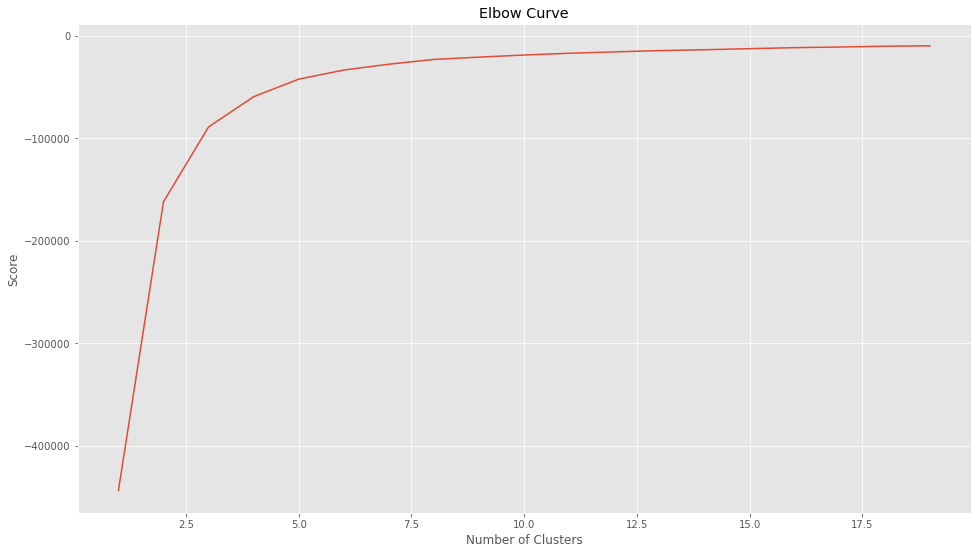

In [144]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [145]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[74.56388889 73.65      ]
 [45.44927536 43.04347826]
 [88.80102041 88.39795918]
 [60.94444444 59.71895425]]


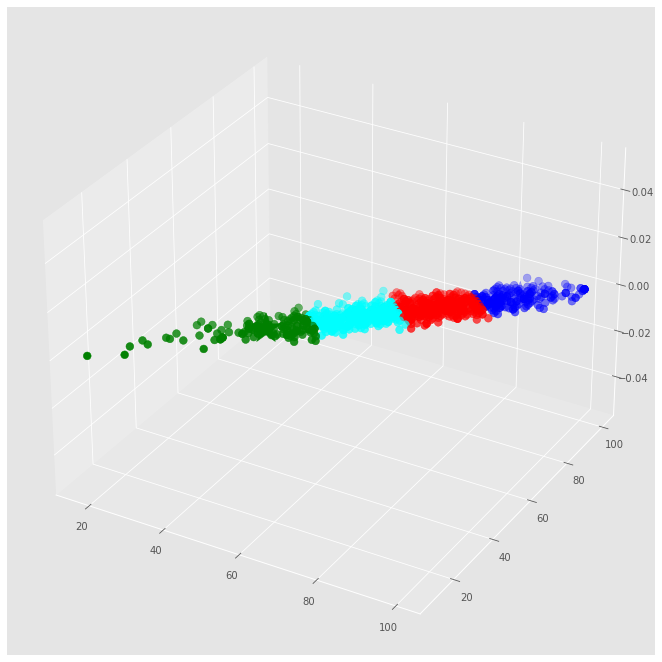

In [147]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan',]
aux=[]
for row in labels:
    aux.append(colores[row])

graf = pl.figure()
ax = Axes3D(graf)
ax.scatter(X[:, 0], X[:, 1], c=aux,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
# Predicting the clusters

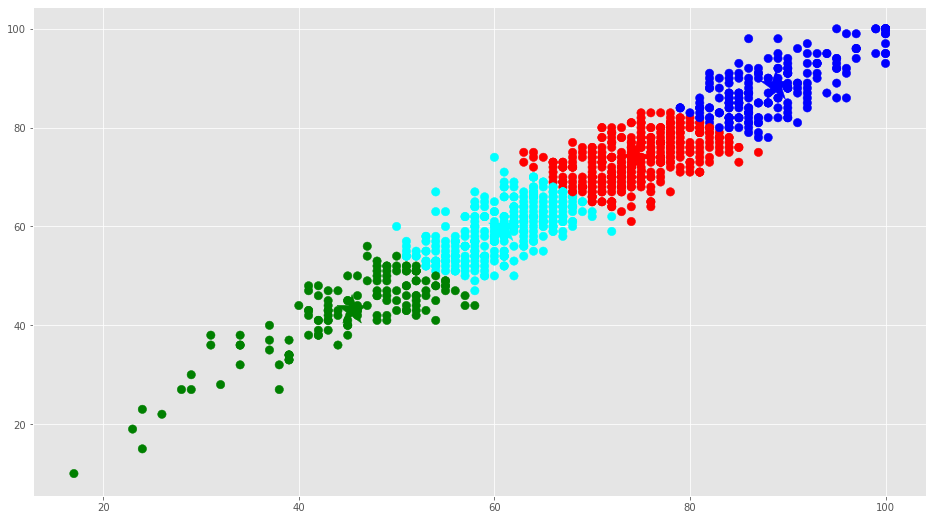

In [149]:
f1 = data['reading score'].values
f2 = data['writing score'].values
 
pl.scatter(f1, f2, c=aux, s=70)
pl.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
pl.show()

In [150]:
copy=pd.DataFrame()
copy['math score']=data['math score'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['math score']=copy.groupby('label').size()
cantidadGrupo['Clase']=['Buena','Muy Mala','Muy Buena','Mala']
cantidadGrupo

,color,math score,Clase
0,red,360,Buena
1,green,137,Muy Mala
2,blue,196,Muy Buena
3,cyan,307,Mala


In [151]:

#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([487, 324, 155, 526], dtype=int64)

In [154]:
X_new = np.array([[57.74,15.66],[90.74,90.66],[30.74,15.66],[40.74,15.66],[70.74,70.66],[30,30],[60,60],[30,70],[50,50],[45,30]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[1 2 1 1 0 1 3 1 1 1]


In [155]:
#Falta Nombres clase, Muy mala, mala , buena y muy buena